In [11]:
import torch 
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms ,datasets
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
batch_size = 32

transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       normalize]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      normalize])

train_dataset = datasets.ImageFolder('training_set_Sample',train_transforms)
test_dataset = datasets.ImageFolder('test_set_Sample',test_transforms)

train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

# train_dataset = datasets.ImageFolder('training_set_Sample',train_transforms)
# test_dataset = datasets.ImageFolder('test_set_Sample',test_transforms)

# train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
# test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


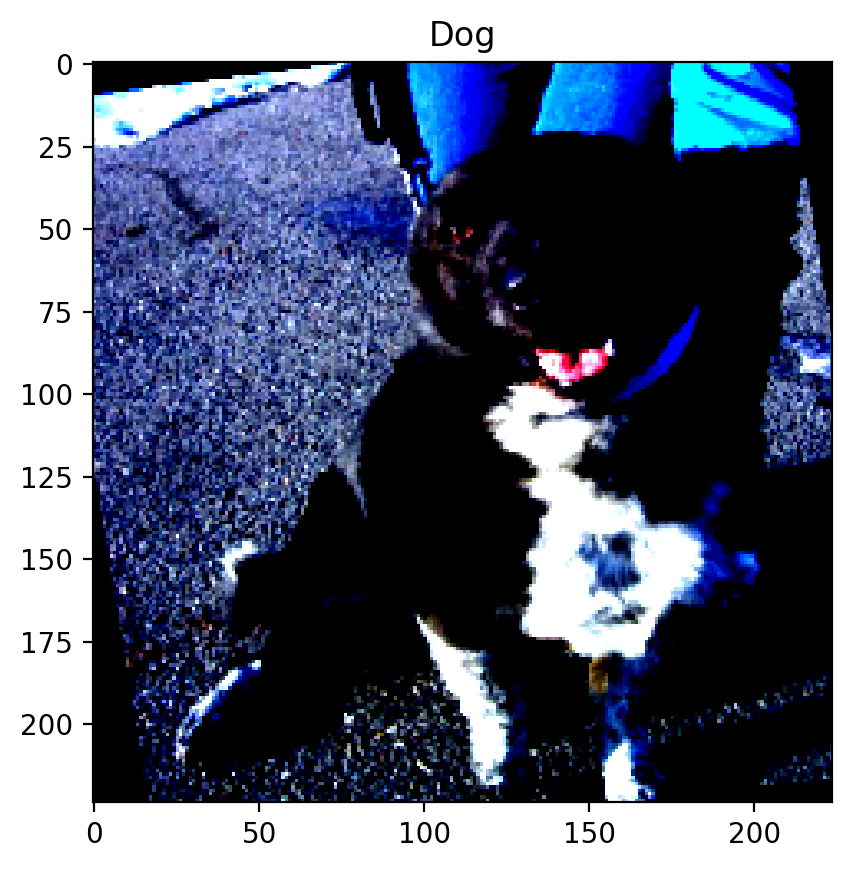

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

for images, labels in train_loader:
    break

image = cv2.cvtColor(np.transpose((images[0,:,:,:]).numpy(),(1,2,0)), cv2.IMREAD_GRAYSCALE)
fig2, ax2 = plt.subplots()
ax2.imshow(image)
ax2.set_title(str("Dog" if labels[0].item() else "Cat"))
plt.show();

In [14]:
acc_for_epochs = [63.0, 80.0, 86.0, 89.0, 91.0, 91.0, 93.0, 90.0, 93.0, 85.0]
loss_for_epochs = [0.6033, 0.445, 0.3487, 0.2996, 0.237, 0.2109, 0.1881, 0.2074, 0.1377, 0.4314]

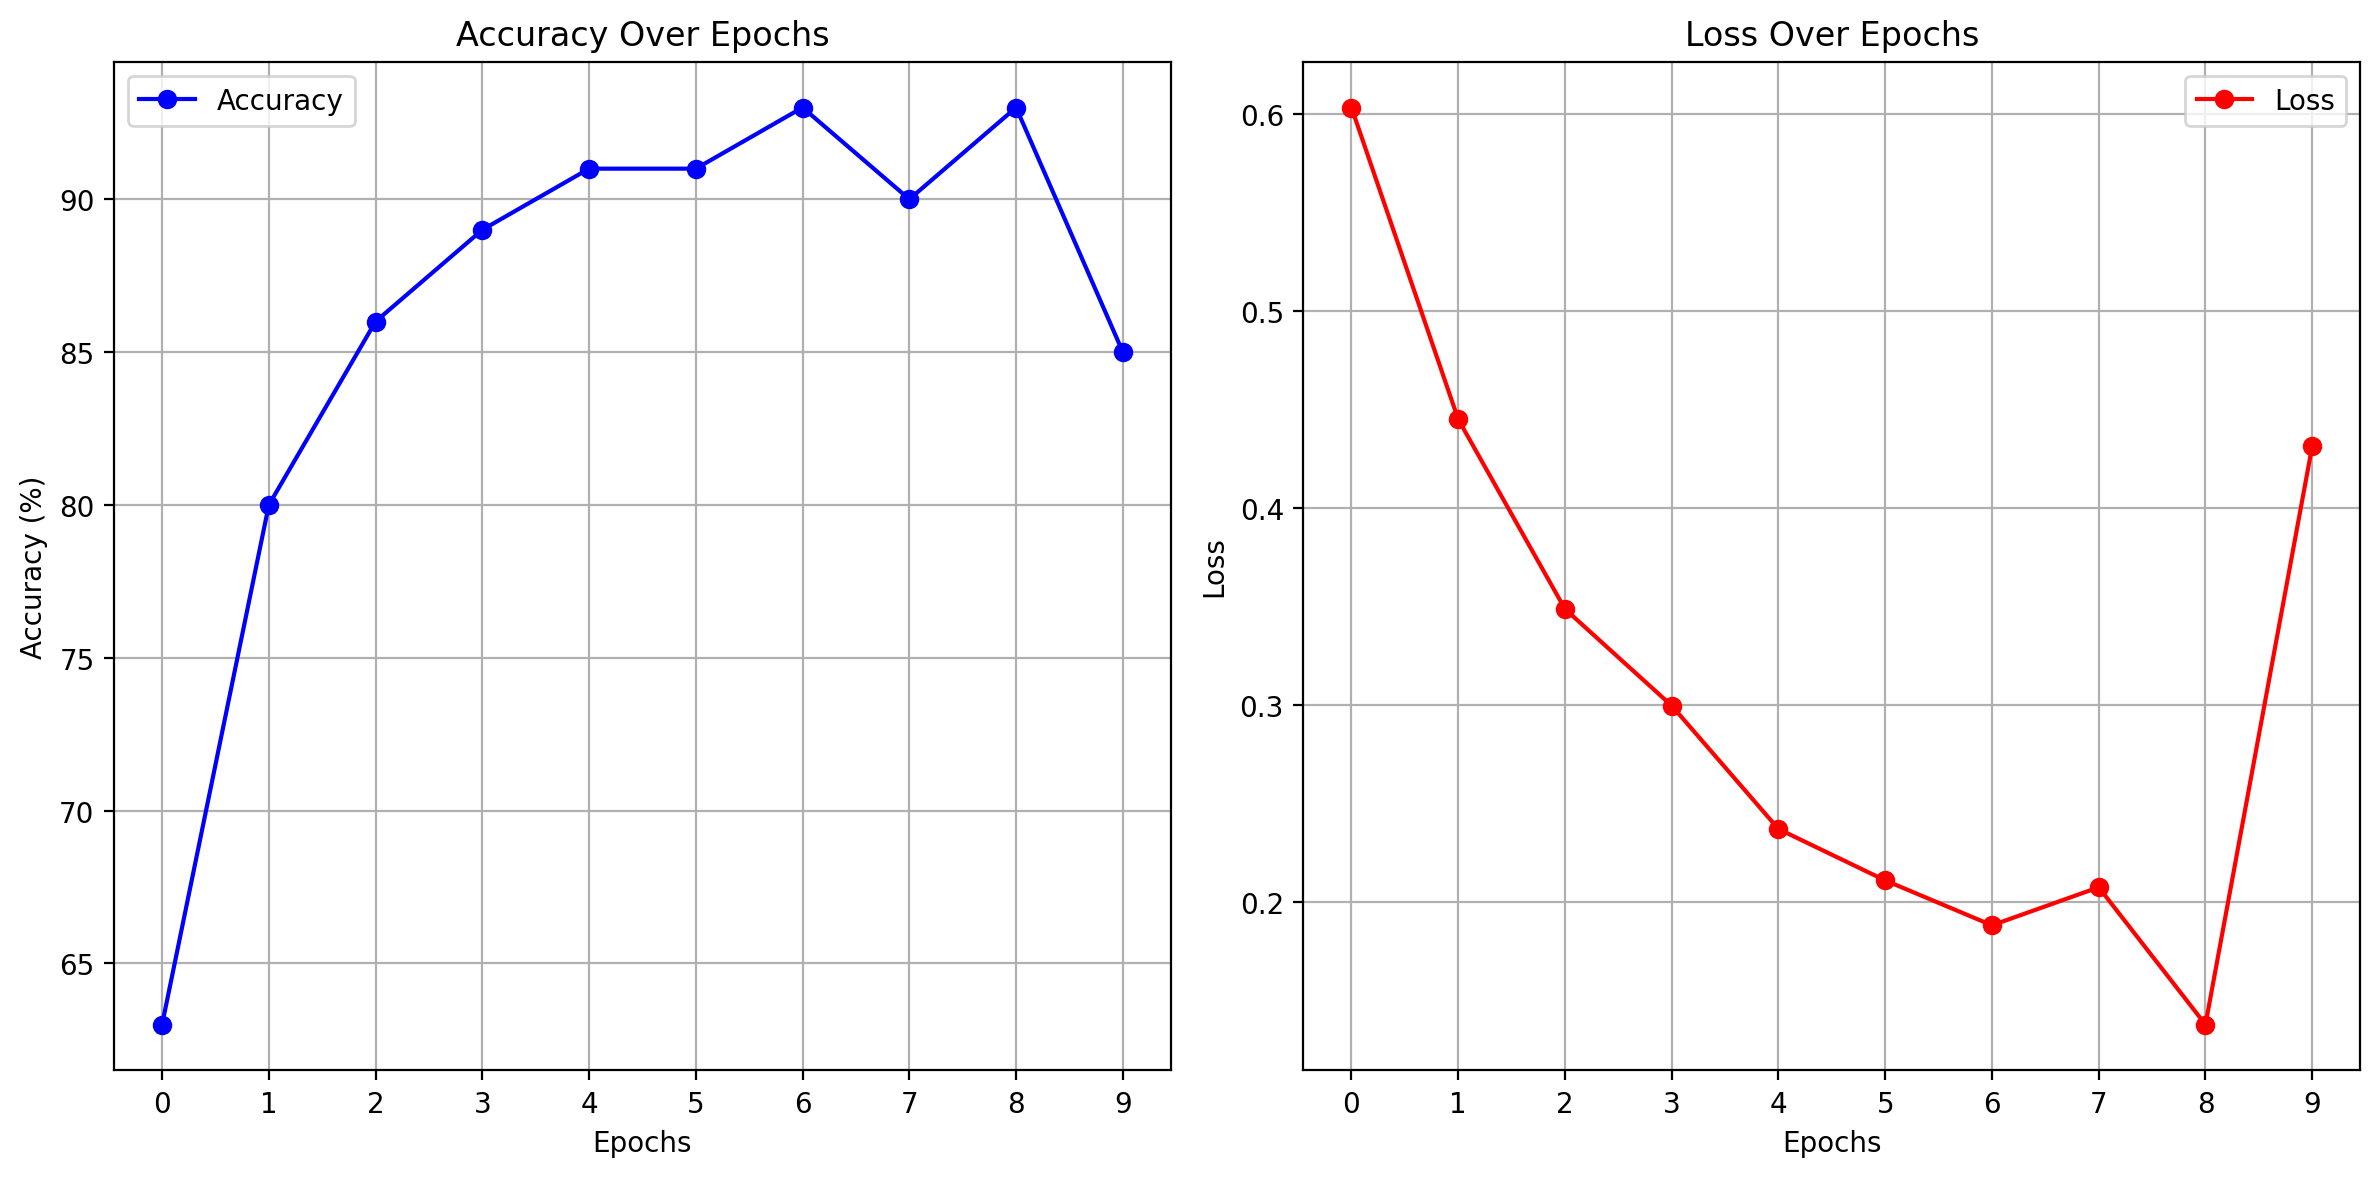

In [15]:

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Accuracy
ax1.plot(acc_for_epochs, label='Accuracy', marker='o', color='blue')
ax1.set_title('Accuracy Over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy (%)')
ax1.set_xticks(range(len(acc_for_epochs)))
ax1.legend()
ax1.grid(True)

# Plot Loss
ax2.plot(loss_for_epochs, label='Loss', marker='o', color='red')
ax2.set_title('Loss Over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_xticks(range(len(loss_for_epochs)))
ax2.legend()
ax2.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show both plots
plt.show()

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_17336\4067547420.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_cnn.load_state_dict(torch.load(model_path,map_locatio

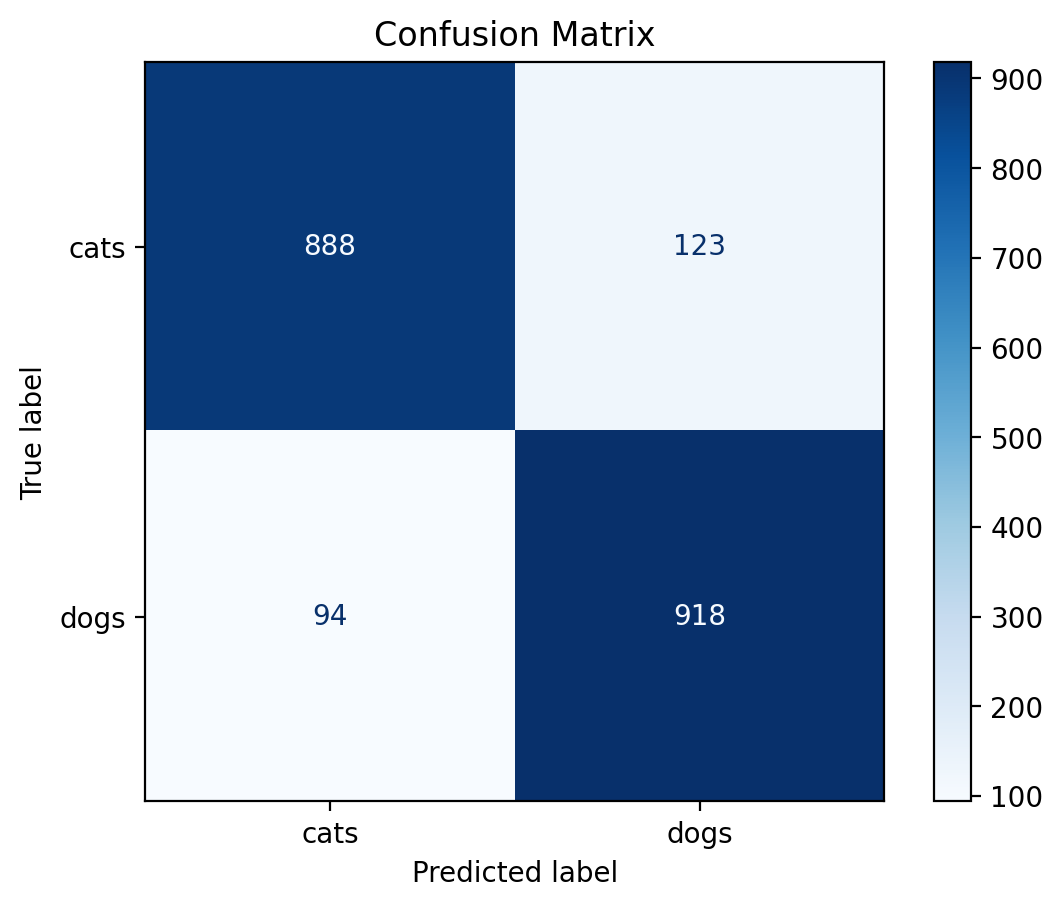

Accuracy: 89.27%


In [16]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from pathlib import Path
from torchvision import datasets, transforms
from arch import Cat_Dog_CNN  # Import the model from your main script

# Define the test data transformations (reuse from main code)
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
test_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])

# Load the test dataset
test_dataset = datasets.ImageFolder('archive/test_set', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_cnn = Cat_Dog_CNN().to(device)
model_path = Path('models/depoly-83-89.pth')  # Update to your trained model path
model_cnn.load_state_dict(torch.load(model_path,map_location=device))
model_cnn.eval()

# Compute predictions and true labels
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device),labels.to(device)
        outputs = model_cnn(images)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds, labels=[0, 1])  # Adjust labels as per your classes
display_labels = test_dataset.classes  # Class names from the dataset

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy * 100:.2f}%")


In [21]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

device = torch.device('cpu')
model= Cat_Dog_CNN().to(device)
p=Path('models/depoly-83-89.pth')
model.load_state_dict(torch.load(p),map_location=device)
class_names = [0,1]

def show_predictions(model, dataset, class_names, device):
    model.eval()
    # data_iter = iter(dataset)
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

    # Get predictions
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

    # Plot images with predicted labels
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(transforms.ToPILImage()(images[i].cpu()))
        ax.set_title(f"Pred: {class_names[preds[i]]}\nTrue: {class_names[labels[i]]}")
        ax.axis('off')

# Assuming `dataloader`, `class_names`, and `device` are defined
show_predictions(model, test_loader, class_names, device)


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_17336\832408097.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(p),map_location=device)


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
class_names = [0,1]

def plot_confusion_matrix(model, dataloader, class_names, device):
    all_preds = []
    all_labels = []

    model.eval()
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title('Confusion Matrix')
    plt.show()

# Call the function
plot_confusion_matrix(model, test_loader, class_names, device)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Ahmed\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Ahmed\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\Users\Ahmed\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Ahmed\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Ahmed\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\Users\Ahmed\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

NameError: name 'model' is not defined